# **Decision Tree Implementation**  

**Author:** Srikar Kalle  
**Student ID:** C00313529  

---
# **Change Log**  
-----------------------------------------------
## **v1.1**  
✅ **Replaced Synthetic Dataset**:  
- The previous implementation used `make_blobs` to generate synthetic clustered data.  
- Updated to use the **Penguins dataset** for a real-world classification problem.  

✅ **Updated Feature Engineering & Preprocessing**:  
- **Encoded categorical variables** (`species`, `island`, `sex`) using `LabelEncoder()`.  
- Dropped `species` from the features to use it as the target variable.  

✅ **Implemented Train-Test Split**:  
- **Replaced previous randomized tree visualization** with a proper `train_test_split` (80/20 split).  
- Ensured reproducibility using `random_state=42`.  

✅ **Model Training and Evaluation**:  
- The previous version only trained and visualized decision boundaries.  
- Now, **trained a Decision Tree Classifier (`DecisionTreeClassifier`)** on the Penguins dataset.  
- **Evaluated performance using:**  
  - `accuracy_score` for model accuracy  
  - `classification_report` for precision, recall, and F1-score  

✅ **Decision Tree Visualization**:  
- **Replaced interactive visualization (`helpers_05_08`)** with `plot_tree()` from `sklearn.tree`.  
- Used feature names from the Penguins dataset.  
- Filled nodes with colors for better readability.  

---

## **v1.0**  
- Initial implementation with synthetic data (`make_blobs`).  
- Used a simple decision boundary visualization.  
- No categorical encoding or real dataset used.  
- No proper evaluation metrics were included.  


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the Penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins.dropna(inplace=True)

In [3]:
# Encode categorical variables
encoder = LabelEncoder()
penguins['species'] = encoder.fit_transform(penguins['species'])
penguins['island'] = encoder.fit_transform(penguins['island'])
penguins['sex'] = encoder.fit_transform(penguins['sex'])

In [4]:
# Define features and target
X = penguins.drop(columns=['species'])  # Features
y = penguins['species']  # Target

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
# Make predictions
y_pred = clf.predict(X_test)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Adelie', 'Chinstrap', 'Gentoo'])

# Print evaluation results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



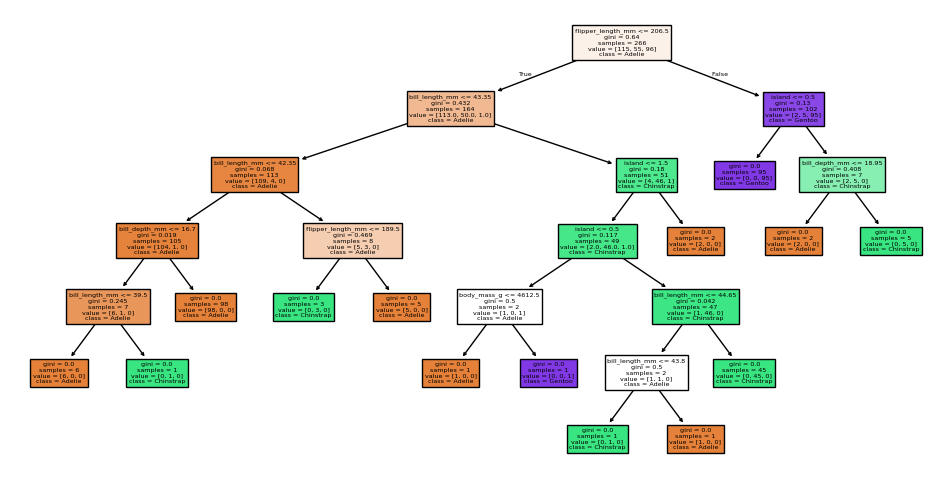

In [11]:
# Plot the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
plt.show()